False


c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


(60000, 784)
0
1
2
3
4


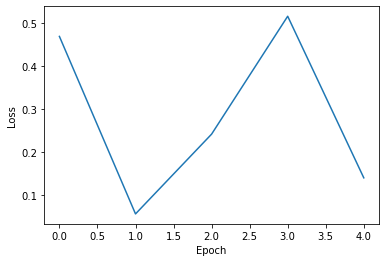


Certainty: 0.5236136317253113

Certainty: 1.0

Certainty: 0.9997933506965637

Certainty: 0.9999998807907104

Certainty: 0.9997389912605286

Certainty: 0.9994521737098694

Certainty: 1.0

Certainty: 1.0

Certainty: 0.9999980926513672


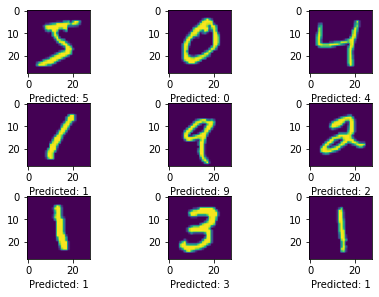

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the MNIST dataset
from torchvision.datasets import MNIST
dataset = MNIST(root='.', download=True)

print(torch.cuda.is_available())

# Preprocess the data
X_train = dataset.train_data.numpy().reshape((-1, 28*28)) / 255.0
X_test = dataset.test_data.numpy().reshape((-1, 28*28)) / 255.0
y_train = dataset.train_labels.numpy()
y_test = dataset.test_labels.numpy()
print(X_train.shape)

# Convert the labels to one-hot encoded vectors
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

BATCHSIZE = 1000
dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float), torch.tensor(y_train, dtype=torch.float))
dataloader = DataLoader(dataset=dataset, batch_size=50, shuffle=True)

# Create the neural network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 128)
        self.fc3 = torch.nn.Linear(128, 128)
        self.fc4 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net()

# Define the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
numEpochs = 5
history = np.zeros(shape=(numEpochs), dtype=float)
# Train the model
for epoch in range(numEpochs):

    for idx, (x_batch,y_batch) in enumerate(dataloader):
        # Forward pass
        outputs = model(x_batch)
        loss = loss_fn(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    history[epoch] = loss.item()
    print(epoch)
    

#Plot the error rate
plt.plot(history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

model.eval()
fig, ax = plt.subplots(3,3)
ax = ax.flatten()
fig.tight_layout(pad=0.9)

for x in range(9):
    test = X_test[x].reshape((28,28))
    ax[x].imshow(test)
    ax[x].set_xlabel("Predicted: " + str(torch.argmax(model(torch.tensor(test.flatten(), dtype=torch.float))).item()))
    print()
    softmax = torch.nn.Softmax(dim=0)
    print("Certainty:",  torch.max(softmax(model(torch.tensor(test.flatten(), dtype=torch.float)))).item())



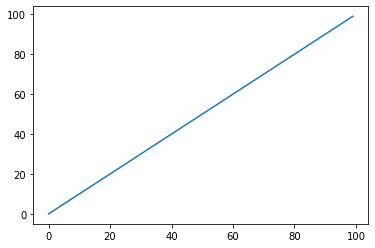

In [1]:
import numpy as np
from matplotlib import pyplot as plt

a = np.arange(100, dtype=float)
plt.plot(a)
plt.show()